In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

def income_simulation(p):
    '''
    Requires a simulation profile, structured as a dictionary

    p = {'inc0'      :(integer),  #starting income
         'Rho'       :(float),    #positive dependence of today's 
                                   income on last period's income
         'g'         :(float),    #long-run growth rate of income 
         'st_year'   :(integer),  #start year
         'num_draws' :(integer),  #simulation
         'mu'        :(float),    #mean of log-normally distribution
         'sigma'.    :(float),    #standard deviation of log-normally distribution
         'work_years':(integer),   #working years 
         'seed'.     :(integer)   #number of ramdon seed}
    '''
    
    mu = p['mu']
    sigma = p['sigma']
    num_draws = p['num_draws']
    work_years = p['work_years']
    inc0 = p['inc0']
    Rho = p['Rho']
    g = p['g']
    seed = p['seed']
 #set random seed#
    np.random.seed(seed)

    lognormal_errors = np.random.normal(mu, sigma, (work_years, num_draws))

 #create a matrix of dim (work_years, num_draws))
    ln_income_mat = np.zeros((work_years, num_draws))

 #fill in the matrix
    ln_income_mat[0, :] = np.log(inc0) + lognormal_errors[0, :]

 #loop and apply model
    for year in range(1, work_years):
        ln_income_mat[year, :] = ((1 - Rho) * (np.log(inc0) + g * year) 
                              + Rho * ln_income_mat[year - 1, :] + 
                              lognormal_errors[year, :])
    
    income_mat = np.exp(ln_income_mat) 
    return income_mat

Text(0,0.5,'Annual income(\\$s)')

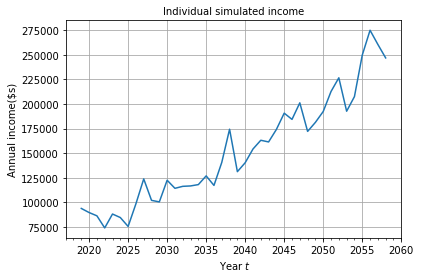

In [2]:
# Answer of Question 1
simulation_profiles ={'inc0': 80000, 
                      'Rho': 0.2, 
                      'g':0.03, 
                      'st_year':2019, 
                      'num_draws': 10000, 
                      'mu':0, 
                      'sigma':0.1, 
                      'work_years':40,
                      'seed':542}

income_mat = income_simulation(simulation_profiles)

%matplotlib inline
p = simulation_profiles
year_vec = np.arange(p['st_year'], p['st_year'] + p['work_years'])
individual = 500
fig, ax = plt.subplots()
plt.plot(year_vec, income_mat[:, individual])
minorLocator = MultipleLocator(1)
ax.xaxis.set_minor_locator(minorLocator)
plt.grid(b = True, which='major', color= '0.65', linestyle='-')
plt.title('Individual simulated income', fontsize=10)
plt.xlabel(r' Year $t$')
plt.ylabel(r'Annual income(\$s)')

0.0938
0.0118


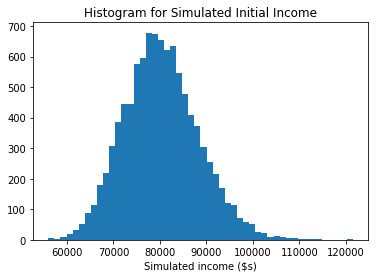

In [3]:
# Answer of Question 2
# Plot the histogram
plt.hist(income_mat[0, :], bins=50)
plt.xlabel(r'Simulated income (\$s)')
plt.title('Histogram for Simulated Initial Income')

# Counting the percent of the class who earn less than 70000
income_lower = np.mean(income_mat[0, :] < 70000)
print(income_lower)

# Counting the percent of the class who earn more than 100000
income_upper = np.mean(income_mat[0, :] > 100000)
print(income_upper)

In [4]:
# Answer of Question 3
def repayment_simulation(p, income_mat):

    '''
    Simulate the total repayment

    Returns: a matrix of total repayment 
    '''
    num_draws = p['num_draws']
    work_years = p['work_years']

#create a matrix of dim (work_years, num_draws))
    total_repayment = np.zeros((work_years, num_draws))

#fill in the matrix
    total_repayment[0, :] = income_mat[0, :] * 0.1

 #loop and apply model
    for year in range(1, work_years):
        total_repayment[year, :] = total_repayment[year - 1, :] + income_mat[year, :] * 0.1

    return total_repayment

def repayment_year(p, income_mat):
    '''
    Calculate the year of paying off the debt

    Returns: the year of repayment
    '''
    num_draws = p['num_draws']
    work_years = p['work_years']

# create an empty list
    repayment_year = [0] * num_draws

# fill in the list
    total_repayment = repayment_simulation(p, income_mat)
    for i in range(num_draws):
        for year in range(work_years):
            if total_repayment[year, i] >= 95000:
                repayment_year[i] = year + 1
                break

    return repayment_year

def calculate_percentage(p, mat):
    '''
    calculate the percentage

    Input:
    p: a simulation profile (dictionary)
    mat: a list

    Returns: the amount of the percentage
    '''
    num_draws = p['num_draws']
    number = 0

    for i in range(num_draws):
        if mat[i] <= 10:
            number += 1

    percentage = number/num_draws

    return percentage

In [5]:
#calculate the percent of simulation that you are able to pay off the loan in 10 years
pay_off_year = repayment_year(simulation_profiles, income_mat)
percentage = calculate_percentage(simulation_profiles, pay_off_year)
print(percentage)

0.1835


Text(0.5,1,'Histogram for years to pay-off debt')

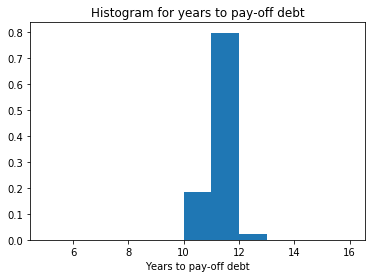

In [6]:
#plot the histogram
plt.hist(pay_off_year, density = True, 
         bins = np.arange(min(pay_off_year) - 5, max(pay_off_year) + 5))
plt.xlabel(r'Years to pay-off debt')
plt.title(r'Histogram for years to pay-off debt') 

In [7]:
# Answer of Question 4
new_profiles = {'inc0': 85000, 
                'Rho': 0.2, 
                'g':0.03, 
                'st_year':2019, 
                'num_draws': 10000, 
                'mu':0, 
                'sigma':0.15, 
                'work_years':40,
                'seed':542}

#calculate the percent of simulation that you are able to pay off the loan in 10 years
new_income = income_simulation(new_profiles)

new_pay_off_year = repayment_year(new_profiles, new_income)

new_percentage = calculate_percentage(new_profiles, new_pay_off_year)

print(new_percentage)

0.6977


Text(0.5,1,'Histogram for years to pay-off debt')

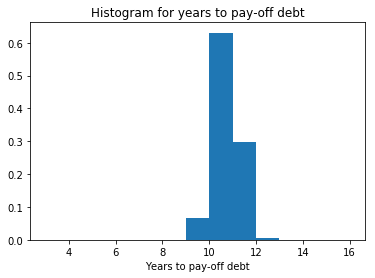

In [8]:
#plot the histogram
plt.hist(new_pay_off_year, density = True, 
         bins = np.arange(min(new_pay_off_year) - 5, max(new_pay_off_year) + 5))
plt.xlabel(r'Years to pay-off debt')
plt.title(r'Histogram for years to pay-off debt') 